In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score # 轮廓系数
from sklearn.metrics import calinski_harabaz_score
from time import time
import warnings

warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [3]:
path='drive/My Drive/Colab Notebooks/cluster/lab7/data/Wholesale customers data.csv'

data = pd.read_csv(path)
print(data.head())
print(data.shape)
data = StandardScaler().fit_transform(data)
print(data[:])
data = np.array(data)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
(440, 8)
[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


In [4]:
import warnings

warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

# 使用默认参数，训练一次
t_start = time()
model = SpectralClustering()
pred = model.fit_predict(data)
t_end = time()
t = t_end - t_start
print('[SpectralClustering] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))
y_hat = model.labels_

# 获取聚类个数。（聚类结果中-1表示没有聚类为离散点）
# n_clusters_ = len(set(y_hat)) - (1 if -1 in y_hat else 0)

print('聚类簇的个数为：', model.n_clusters)
silhouette_s = silhouette_score(data, model.labels_, metric='euclidean')
calinski_harabaz_s = calinski_harabaz_score(data, model.labels_)

print('轮廓系数：', silhouette_s)
print('calinski_harabaz_score：', calinski_harabaz_s)

[SpectralClustering] 0分钟0.152秒
聚类簇的个数为： 8
轮廓系数： 0.7059240185173244
calinski_harabaz_score： 61.46493426123481


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  n_init=n_init)


In [12]:
# 使用定义的参数，多次训练
i = []
y_silhouette_score = []
inertia_score = []
calinskiharabaz_score = []

t_start = time()
for k in range(2,15+2):
#     model = SpectralClustering(n_clusters = k, affinity='precomputed', assign_labels='kmeans', random_state=1)
    model = SpectralClustering(n_clusters = k, affinity='rbf', assign_labels='kmeans', random_state=1)
    pred = model.fit_predict(data)
#     print(data)
    silhouette_s = silhouette_score(data, pred, metric='euclidean')
    print("silhouette_score for cluster {0}: {1}".format(k, silhouette_s))
    calinski_harabaz_s = calinski_harabaz_score(data, pred)
    print("calinski_harabaz_score for cluster {0}: {1}".format(k, calinski_harabaz_s))

    i.append(k)
    y_silhouette_score.append(silhouette_s)
    calinskiharabaz_score.append(calinski_harabaz_s)
t_end = time()

t = t_end - t_start
print('[SpectralClustering] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))

silhouette_score for cluster 2: 0.8263511877226627
calinski_harabaz_score for cluster 2: 48.88261369642371
silhouette_score for cluster 3: 0.8263511877226627
calinski_harabaz_score for cluster 3: 48.88261369642371
silhouette_score for cluster 4: 0.8263511877226627
calinski_harabaz_score for cluster 4: 48.88261369642371
silhouette_score for cluster 5: 0.8263511877226627
calinski_harabaz_score for cluster 5: 48.88261369642371


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  n_init=n_init)


silhouette_score for cluster 6: 0.8263511877226627
calinski_harabaz_score for cluster 6: 48.88261369642371
silhouette_score for cluster 7: 0.8263511877226627
calinski_harabaz_score for cluster 7: 48.88261369642371
silhouette_score for cluster 8: 0.7059240185173244
calinski_harabaz_score for cluster 8: 61.46493426123481


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


silhouette_score for cluster 9: 0.8263511877226627
calinski_harabaz_score for cluster 9: 48.88261369642371
silhouette_score for cluster 10: 0.8263511877226627
calinski_harabaz_score for cluster 10: 48.88261369642371


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


silhouette_score for cluster 11: 0.7059240185173244
calinski_harabaz_score for cluster 11: 61.46493426123481
silhouette_score for cluster 12: 0.8263511877226627
calinski_harabaz_score for cluster 12: 48.88261369642371


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  n_init=n_init)


silhouette_score for cluster 13: 0.8263511877226627
calinski_harabaz_score for cluster 13: 48.88261369642371
silhouette_score for cluster 14: 0.8263511877226627
calinski_harabaz_score for cluster 14: 48.88261369642371


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  n_init=n_init)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  n_init=n_init)


silhouette_score for cluster 15: 0.8263511877226627
calinski_harabaz_score for cluster 15: 48.88261369642371
silhouette_score for cluster 16: 0.8263511877226627
calinski_harabaz_score for cluster 16: 48.88261369642371
[SpectralClustering] 0分钟1.512秒


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  n_init=n_init)


Text(0.5, 1.0, 'k--calinski_harabaz_score')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


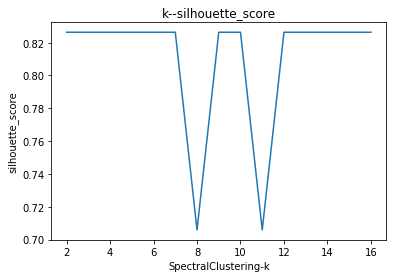

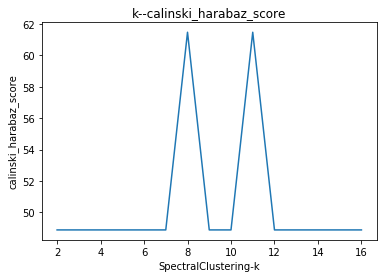

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure()  
plt.plot(i, y_silhouette_score)  
plt.xlabel("SpectralClustering-k")  
plt.ylabel("silhouette_score")  
plt.title("k--silhouette_score")  

plt.figure()  
plt.plot(i, calinskiharabaz_score)  
plt.xlabel("SpectralClustering-k")  
plt.ylabel("calinski_harabaz_score")  
plt.title("k--calinski_harabaz_score")  